<a href="https://colab.research.google.com/github/veronica1013/Titanic_Analysis/blob/main/Titanic_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Titanic Analysis

### 1. Defining the Question

### a.) Specifying the Question

Using K-nearest neighbor (kNN) classifier and Naive Bayes classifier to create a model that predicts which passengers survived the Titanic shipwreck.

### b.) Defining the Metric for Success

1. Computing the accuracy (percentage of correct classification).
2. Reporting the confusion matrix of each classifier.
3. Applying at least one of the optimization techniques.
4. Providing recommendations to improve both classifiers (K-nearest neighbor (kNN) classifier and Naive Bayes classifier).

### c.) Understanding the Context

In [135]:
# importing Relevant Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score


### Loading the Data (both train and test sets)

In [2]:
#uploading the data
url_1_train_set = "https://archive.org/download/train5_202002/train%20%285%29.csv"
df_train= pd.read_csv(url_1_train_set)
df_train.head(2)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [3]:
url_2_test_set = "https://archive.org/download/test1_202002/test%20%281%29.csv"
df_test=pd.read_csv(url_2_test_set)
df_test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


### Preview the two datasets

### 1. Previewing the Train dataset

In [4]:
# Preview the train dataset
df_train.shape

(891, 12)

In [5]:
# Check for the data types
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Check for the basic analysis
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# Check for missing values
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# Check for duplicates
df_train.duplicated().sum()

0

In [12]:
# Check for Columns Names
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

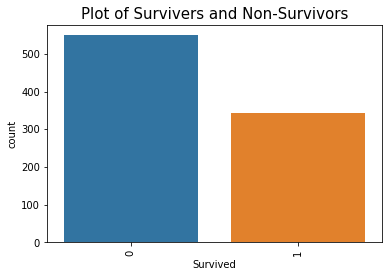

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#visuallising the through a Count Plot
sns.countplot(x='Survived', data = df_train) # (x=importances['Column Name'], height=importances['Importance'], color='#087E8B')
plt.title('Plot of Survivers and Non-Survivors', size=15)
plt.xticks(rotation='vertical')
plt.show()

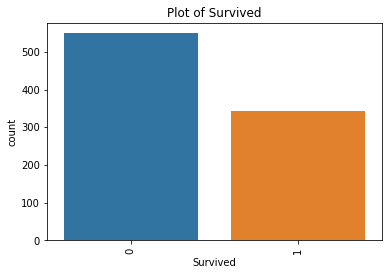

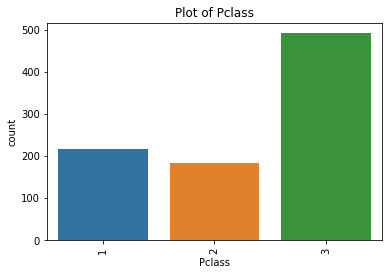

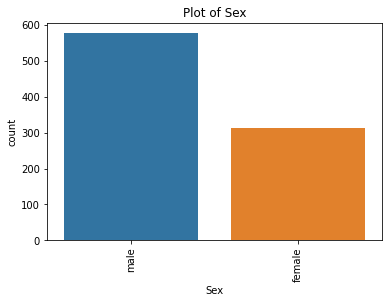

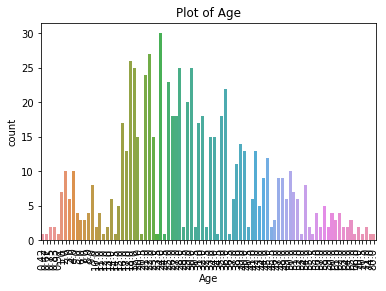

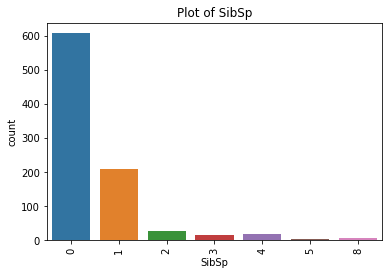

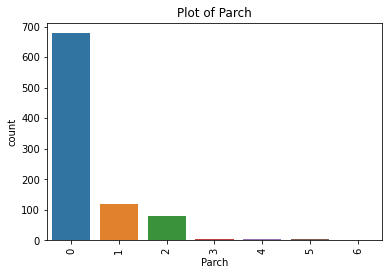

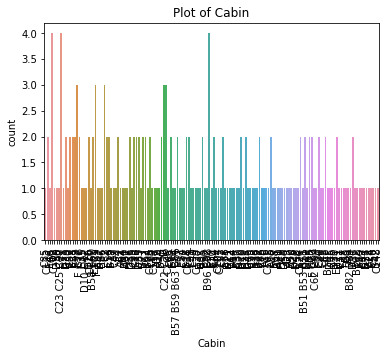

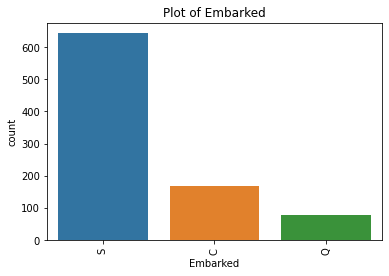

In [31]:
col = df_train[['Survived','Pclass', 'Sex', 'Age', 'SibSp',
             'Parch', 'Cabin', 'Embarked']]

for i in col:
  #visuallising the through a Count Plot
  sns.countplot(x=i, data = df_train)
  plt.title(f'Plot of {i}')
  plt.xticks(rotation='vertical')
  plt.show()


In [43]:
df_train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [40]:
# Check how many cabin groups are on titanic
df_train.groupby('Cabin').sum()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Cabin,,,,,,,
A10,584,0,1,36.0,0,0,40.1250
A14,476,0,1,0.0,0,0,52.0000
A16,557,1,1,48.0,1,0,39.6000
A19,285,0,1,0.0,0,0,26.0000
A20,600,1,1,49.0,1,0,56.9292
...,...,...,...,...,...,...,...
F33,930,3,6,87.0,0,0,34.0000
F38,777,0,3,0.0,0,0,7.7500
F4,803,2,4,5.0,4,2,78.0000


In [44]:
df_train['Cabin'].value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
F33            3
C22 C26        3
              ..
C90            1
A5             1
A20            1
D49            1
E34            1
Name: Cabin, Length: 147, dtype: int64

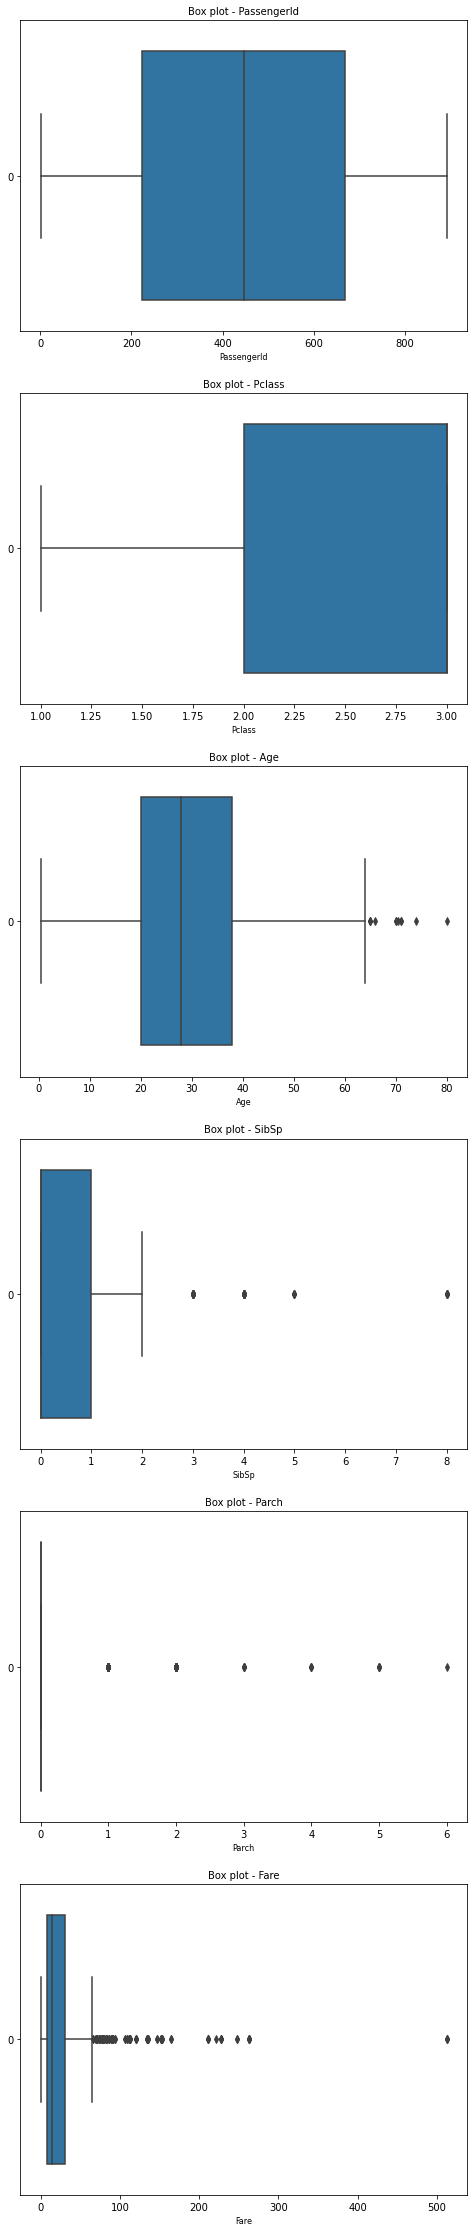

In [63]:
# Check for outliers
# Check for outliers
# Plotting columns with numerical values only to check for outliers
col_names = ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

fig, ax = plt.subplots(len(col_names), figsize= (8,40))

for i, col_val in enumerate(col_names):
  sns.boxplot(data = df_train[col_val], ax= ax[i], orient="h")
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize= 10)
  ax[i].set_xlabel(col_val, fontsize= 8)
plt.show()

### Check for the Outlier Percentage

In [65]:
# Check for outliers Percentage in the dataset.
# Set the 25th percentile
Quantile_1 = df_train[col_names].quantile(0.25)

# set the 75th percentile
Quantile_3 = df_train[col_names].quantile(0.75)

# calculate the quantile range
IQR = Quantile_3 - Quantile_1

# Determine the outliers
outliers = df_train[col_names][((df_train[col_names] < (Quantile_1 - 1.5 * IQR))
 |(df_train[col_names] > (Quantile_3 + 1.5 * IQR))).any(axis=1)]
j = outliers.shape

# Outliers Percentage
percentage_of_outliers = (len(outliers)/len(df_train))*100

# The total number of outliers
print(f"The total number of outliers are {j}. Which translates to {percentage_of_outliers}% of the data.")

The total number of outliers are (293, 6). Which translates to 32.88439955106622% of the data.


from the above results, it indicates that 293 rows and 6 columns are affected by outliers. We will print out this outliers to have a deeper look into the details

In [66]:
# Check the shape of the dataset and compare with the shape of the outliers found
df_train.shape

(891, 12)

### Check the normality of the dataset to determine which machine learning model that will be applied

In [69]:
# First check the datatypes
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [88]:
# Then Check the data distribution type by performing a normality test using the Shapiro Test
# importing the shapiro function
from scipy.stats import shapiro

col_names3 = df_train[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',]]

# Test for normality
stat, p = shapiro(col_names3)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Interpreting the results
alpha = 0.05
if p > alpha: 
  print('Sample looks Guassian.')
else:
  print('Sample does not look Guassian.')

Statistics=nan, p=1.000
Sample looks Guassian.


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [92]:
df_duplicates = df_train[df_train.duplicated(subset=['PassengerId', 'Ticket'], keep=False)]
df_duplicates

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [98]:
df_train.groupby(['Survived']).sum()


,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,245412,1390,12985.50,304,181,12142.7199
1,151974,667,8219.67,162,159,16551.2294


In [127]:
survived_groups = df_train['Survived'].value_counts()
survived_groups


0    549
1    342
Name: Survived, dtype: int64

In [128]:
survived_groups = pd.crosstab(index=df_train["Survived"], columns="count") 

survived_groups



col_0,count
Survived,
0,549
1,342


### Performing Feature Engineering

In [133]:
# Check the unique values in Pclass column
df_train['Pclass'].unique()

array([3, 1, 2])

In [134]:
# Get frequency table of the column using Groupby count()
#PassengerId	Pclass	Age	SibSp	Parch	Fare
df_train.groupby(['Survived', 'Age', 'Pclass'])['Pclass'].count()


Survived  Age   Pclass
0         1.0   3         2
          2.0   1         1
                3         6
          3.0   3         1
          4.0   3         3
                         ..
1         62.0  1         1
                2         1
          63.0  1         1
                3         1
          80.0  1         1
Name: Pclass, Length: 264, dtype: int64

# Choose a dataset using randon seed

In [ ]:
# Choose a dataset using randon seed
import numpy as np; np.random.seed(42)
df = pd.DataFrame(data = np.random.random(size=(4,4)), columns = ['A','B','C','D'])

In [ ]:
# Apply the function on the entire tweet column
df_train['tweet'] = df_train['tweet'].map(lambda x: clean_text(x))